# Simple Linear Regression

In this example we will consider sales based on 'TV' marketing budget.

In this nootbook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable'.

# Understanding the Data

Below are the following steps

1.Importing data using the pandas library

2.Understanding the structure of the data

In [1]:
import pandas as pd

In [4]:
advertising=pd.read_csv('tvmarketing.csv')


Now, let's check the structure of the advertising dataset

In [5]:
advertising

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6


In [6]:
# To display the first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [7]:
# To display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [8]:
# Let's check the columns 
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
# Let's check the shape of the DataFrame (rows & columns )
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualising Data Using Seaborn

In [10]:
# Conventional way to import seaborn 
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

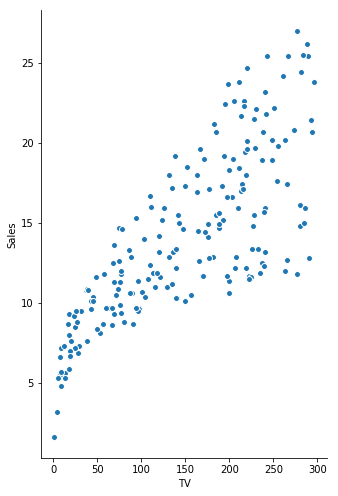

In [12]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(advertising, x_vars='TV', y_vars='Sales', size=7, aspect=0.7, kind= 'scatter')

# Performing Simple Linear Regression

Equation of linear regression

y = c + m1x1+m2x2+....+mnxn

. y is the response (dependent variable)
. c is the intercept
. m1 is the coefficient for the first feature (slope)
. mn is the coefficient for the nth feature

In our case:

y = c +m1 * TV

The m value are called the model coeffiecients or model parameters.

# Generic Steps in Model Building using Sklearn

# Preparing x and y

. The sklearn library expects x(feature variable) and y(target variable) to be NumPy arrays.

. However, x can be determined as Pandas is built over NumPy.

In [52]:
# Putting feature variable to x  # Using iloc function to segregate the feature & target
x = advertising.iloc[:,:-1].values
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [53]:
# Putting target variable to y
y = advertising.iloc[:,1].values
y


array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

# Splitting Data into Training and Testing Sets

In [55]:
# random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

In [56]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [59]:
#check the shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(140, 1)
(140,)
(60, 1)
(60, 1)


# Performing Linear Regression

In [60]:
# import LinearRegresion from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as linreg(creating LinearRegression object)
linreg = LinearRegression()

#Fit the model using linreg.fit()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Coefficients Calculation

In [61]:
# Print the intercept and the coefficients
print(linreg.intercept_)
print(linreg.coef_)

6.989665857411681
[0.04649736]


y=6.989 + 0.0464 * TV

Now let's use the this equation to predict our sales

In [62]:
# Making the prediction on the testing dataset
y_pred = linreg.predict(x_test)
y_pred

array([ 7.35234526, 18.06533671, 13.27610876, 17.11214086, 18.22807747,
       16.60531965, 13.4620982 , 16.17754395, 17.05169429, 17.07029323,
       12.4391563 , 17.66080969,  9.60281742, 15.72186983, 11.04423554,
       11.36971705, 13.95032046, 14.90351632, 14.59198401, 12.23921766,
       16.97264878, 13.00642408, 16.07524976, 15.21969836, 15.58702749,
       17.23303399, 17.20978531, 10.49091697, 15.58702749, 12.71349072,
       10.1700852 , 10.19798361, 12.61584627, 15.74976825,  9.31453379,
       12.59259759, 11.50920913, 14.81982107, 17.33067844, 15.97295557,
       17.00519693, 15.15925179, 14.63848137, 17.14933874, 12.57864838,
       11.16047894,  7.77547122, 18.55820871, 10.27237939,  8.76586496,
       16.405381  , 14.95466341, 10.4816175 , 13.08546959, 16.78665935,
        9.05879832,  7.78942043,  8.17999824, 16.17754395, 10.9744895 ])

In [64]:
y_test

array([ 6.6, 20.7, 17.2, 19.4, 21.8, 12.2, 12.2, 11.7, 22.6, 22.3, 11.9,
       19.7,  8.7, 15.6, 10.6,  9.7, 17.3, 11.7, 18. , 11.9, 17.4, 11. ,
       22.4, 17.1, 15.5, 24.7, 19.6, 11.3, 20.7, 15.2, 13.6,  9.3, 11.6,
       14.9,  8.4, 14.2,  9.6, 11.7, 11.5, 15.2, 17.1, 14.1, 14.5, 12.2,
       13.2, 10.6,  8.7, 18.9, 10.5,  7.6, 16.6, 19. , 12.6, 18. , 18.4,
       10.4,  5.9,  9.5, 16.6, 13.3])

In [63]:
type(y_pred)

numpy.ndarray

# Computing RMSE and R^2 values

In [66]:
# Find out r^2 score
from sklearn.metrics import r2_score

In [76]:
r2_score(y_test,y_pred)


0.5942987267783302

It means the accuracy of the model is around 60%

In [77]:
# Find out RMSE
from sklearn.metrics import mean_squared_error

In [79]:
Mean_square_error=mean_squared_error(y_test,y_pred)
Mean_square_error

7.975798532854849

It means the model is not able to match around 8% values only

# Graphical representation

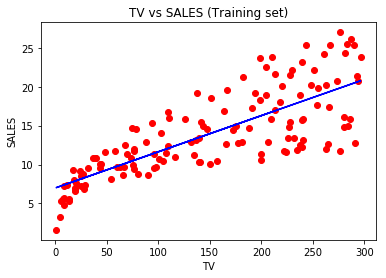

In [83]:
#plotting Regression line in training set
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train,linreg.predict(x_train),color='blue')
plt.title('TV vs SALES (Training set)')
plt.xlabel('TV')
plt.ylabel('SALES')
plt.show()

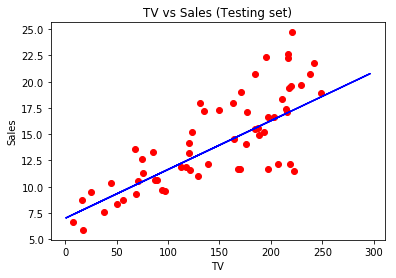

In [87]:
#plotting Regression line in test set
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,linreg.predict(x_train), color='blue')
plt.title('TV vs Sales (Testing set)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

[]

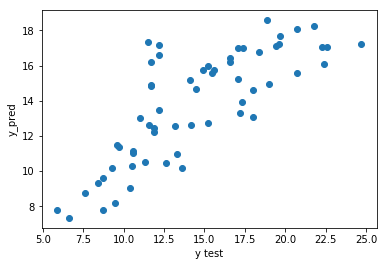

In [85]:
# Actual vs predict
plt.scatter(y_test,y_pred)
plt.xlabel('y test')
plt.ylabel('y_pred')
plt.plot()

# End